In [1]:
import pandas as pd
import numpy as np
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/Copy of dataset.csv")

In [7]:
# See the first 10 Rows)
df.head(10)

,reviewId,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,predicted_category,sentiment
0,326d4bdd-8fc6-4d64-b3bf-ce393fb2ae9b,woww,5,0,NaN,2022-08-16 05:55:38,NaN,NaN,USER_EXPERIENCE,NEUTRAL
1,4bbf741b-2f69-43cd-bb76-f9b5f84c83b5,let me know more details about this,3,0,4.5.1143533,2022-08-16 04:44:45,NaN,NaN,CONTENT,NEUTRAL
2,3cb1136d-e7c6-4999-aa84-fdc7bcdccf56,i've been using this for a while and there's a...,2,0,4.5.1143533,2022-08-16 04:05:27,NaN,NaN,INTERFACE,NEGATIVE
3,d6f80f05-a6e8-44f3-a380-7c59ed3d208b,good,2,0,4.5.1143533,2022-08-16 00:22:33,NaN,NaN,USER_EXPERIENCE,POSITIVE
4,eecb277c-c658-4b2d-86c9-77d3a7022cac,mjkobe,5,0,4.5.1143533,2022-08-15 20:08:25,NaN,NaN,USER_EXPERIENCE,NEUTRAL
5,738e80f5-ecb7-4489-bd01-fdf9f84cc7d4,good,2,0,4.5.1143533,2022-08-15 20:05:47,NaN,NaN,USER_EXPERIENCE,POSITIVE
6,f190d2a9-b627-4839-ab4a-4b0da9ad260c,awesome for me who likes to read about differe...,5,0,4.5.1143533,2022-08-15 19:29:54,NaN,NaN,CONTENT,POSITIVE
7,015ff161-7372-4bea-a0df-2e7402d1d287,best thing i discovered in my life. that's is ...,5,0,4.5.1143533,2022-08-15 17:44:17,NaN,NaN,USER_EXPERIENCE,POSITIVE
8,48c50ab1-3097-4e27-bb49-15ad818e2c66,good project,5,0,4.5.1143533,2022-08-15 16:45:30,NaN,NaN,USER_EXPERIENCE,POSITIVE
9,f2b514ba-27c4-49da-8831-ddbd9c67287f,"basic search functionality is non existent, no...",1,0,4.5.1143533,2022-08-15 15:46:29,NaN,NaN,INTERFACE,NEGATIVE


In [8]:
# check for missing values
print(df.isnull().sum())

reviewId                    0
content                     0
score                       0
thumbsUpCount               0
reviewCreatedVersion     5047
at                          0
replyContent            42937
repliedAt               42937
predicted_category          0
sentiment                   0
dtype: int64


In [9]:
df = df.drop(columns=['reviewId', 'score', 'thumbsUpCount','replyContent', 'reviewCreatedVersion','repliedAt', 'at', 'sentiment'], axis=1)
# Determine the number of rows in the dataframe
n_rows = df.shape[0]

import random
#drop 3/4 the dataset
fraction = 3/4
mask = random.sample(range(df.shape[0]), int(df.shape[0] * fraction))
df = df.drop(df.index[mask], axis=0)


In [10]:
# Preprocessing the content column
def preprocess(content):
    # Convert to lowercase
    content = content.lower()
    
    # Remove numbers
    content = re.sub(r'\d+', '', content)
    
    # Remove punctuation
    content = re.sub(r'[^\w\s]', '', content)
    
    # Tokenize the words
    words = word_tokenize(content)
    
    # Remove stop words
    stop_words = set(stopwords.words("english"))
    words = [word for word in words if word not in stop_words]
    
    # Lemmatize the words
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    
    # Join the words back together as a string
    content = " ".join(words)
    
    return content

The code above performs several preprocessing steps on the content column of the dataset. Here's what each step does:

*   Convert the text to lowercase.
*   Remove numbers using regular expressions.
*   Remove punctuation using regular expressions
*   Tokenize the words using the word_tokenize function from the nltk library.
*   Remove stop words using the stopwords corpus from the nltk library.
*   Lemmatize the words using the WordNetLemmatizer from the nltk library.
*   Join the words back together as a string.










In [11]:
# Apply the preprocessing function to the content column
df["content"] = df["content"].apply(preprocess)
df["predicted_category"] = df["predicted_category"].apply(preprocess)

In [12]:
#df.to_csv("/content/drive/My Drive/preprocessed.csv")

In [13]:
df_preprocessed = df

In [14]:
df_preprocessed.head()

,content,predicted_category
1,let know detail,content
4,mjkobe,user_experience
7,best thing discovered life thats call nature g...,user_experience
8,good project,user_experience
10,great project,user_experience


In [15]:
print(df_preprocessed.isnull().sum())

content               0
predicted_category    0
dtype: int64


In [16]:
df_preprocessed.fillna("-", inplace=True)

In [17]:
print(df_preprocessed.isnull().sum())

content               0
predicted_category    0
dtype: int64


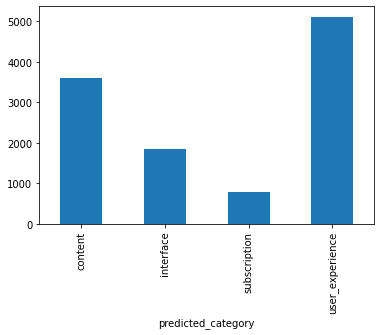

In [18]:
df.groupby(['predicted_category']).size().plot.bar()

In [19]:
!pip install transformers
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-cased')

example_text = 'I will watch Memento tonight'
bert_input = tokenizer(example_text,padding='max_length', max_length = 10, 
                       truncation=True, return_tensors="pt")


print(bert_input['input_ids'])
print(bert_input['token_type_ids'])
print(bert_input['attention_mask'])

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 68.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 70.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 27.7 MB/s eta 0:00:00


tensor([[  101,   146,  1209,  2824,  2508, 26173,  3568,   102,     0,     0]])
tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
tensor([[1, 1, 1, 1, 1, 1, 1, 1, 0, 0]])


In [20]:
example_text = tokenizer.decode(bert_input.input_ids[0])

print(example_text)


[CLS] I will watch Memento tonight [SEP] [PAD] [PAD]


In [21]:
import torch
import numpy as np
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-cased')
labels = {'content':0,
          'interface':1,
          'subscription':2,
          'user_experience':3,
          }

class Dataset(torch.utils.data.Dataset):

    def __init__(self, df):

        self.labels = [labels[label] for label in df['predicted_category']]
        self.texts = [tokenizer(text, 
                               padding='max_length', max_length = 512, truncation=True,
                                return_tensors="pt") for text in df['content']]

    def classes(self):
        return self.labels

    def __len__(self):
        return len(self.labels)

    def get_batch_labels(self, idx):
        # Fetch a batch of labels
        return np.array(self.labels[idx])

    def get_batch_texts(self, idx):
        # Fetch a batch of inputs
        return self.texts[idx]

    def __getitem__(self, idx):

        batch_texts = self.get_batch_texts(idx)
        batch_y = self.get_batch_labels(idx)

        return batch_texts, batch_y

In [22]:
np.random.seed(48)
df_train, df_val, df_test = np.split(df.sample(frac=1, random_state=42), 
                                     [int(.8*len(df)), int(.9*len(df))])

print(len(df_train),len(df_val), len(df_test))

9083 1135 1136


In [23]:
from torch import nn
from transformers import BertModel

class BertClassifier(nn.Module):

    def __init__(self, dropout=0.5):

        super(BertClassifier, self).__init__()

        self.bert = BertModel.from_pretrained('bert-base-cased')
        self.dropout = nn.Dropout(dropout)
        self.linear = nn.Linear(768, 5)
        self.relu = nn.ReLU()

    def forward(self, input_id, mask):

        _, pooled_output = self.bert(input_ids= input_id, attention_mask=mask,return_dict=False)
        dropout_output = self.dropout(pooled_output)
        linear_output = self.linear(dropout_output)
        final_layer = self.relu(linear_output)

        return final_layer

In [25]:
from torch.optim import Adam
from tqdm import tqdm

def train(model, train_data, val_data, learning_rate, epochs):

    train, val = Dataset(train_data), Dataset(val_data)

    train_dataloader = torch.utils.data.DataLoader(train, batch_size=8, shuffle=True)
    val_dataloader = torch.utils.data.DataLoader(val, batch_size=8)

    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")

    criterion = nn.CrossEntropyLoss()
    optimizer = Adam(model.parameters(), lr= learning_rate)

    if use_cuda:

            model = model.cuda()
            criterion = criterion.cuda()

    for epoch_num in range(epochs):

            total_acc_train = 0
            total_loss_train = 0

            for train_input, train_label in tqdm(train_dataloader):

                train_label = train_label.to(device)
                mask = train_input['attention_mask'].to(device)
                input_id = train_input['input_ids'].squeeze(1).to(device)

                output = model(input_id, mask)
                
                batch_loss = criterion(output, train_label.long())
                total_loss_train += batch_loss.item()
                
                acc = (output.argmax(dim=1) == train_label).sum().item()
                total_acc_train += acc

                model.zero_grad()
                batch_loss.backward()
                optimizer.step()
            
            total_acc_val = 0
            total_loss_val = 0

            with torch.no_grad():

                for val_input, val_label in val_dataloader:

                    val_label = val_label.to(device)
                    mask = val_input['attention_mask'].to(device)
                    input_id = val_input['input_ids'].squeeze(1).to(device)

                    output = model(input_id, mask)

                    batch_loss = criterion(output, val_label.long())
                    total_loss_val += batch_loss.item()
                    
                    acc = (output.argmax(dim=1) == val_label).sum().item()
                    total_acc_val += acc
            
            print(
                f'Epochs: {epoch_num + 1} | Train Loss: {total_loss_train / len(train_data): .3f} \
                | Train Accuracy: {total_acc_train / len(train_data): .3f} \
                | Val Loss: {total_loss_val / len(val_data): .3f} \
                | Val Accuracy: {total_acc_val / len(val_data): .3f}')
                  
EPOCHS = 5
model = BertClassifier()
LR = 1e-6
              
train(model, df_train, df_val, LR, EPOCHS)

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
100%|██████████| 1136/1136 [12:49<00:00,  1.48it/s]


Epochs: 1 | Train Loss:  0.139                 | Train Accuracy:  0.578                 | Val Loss:  0.097                 | Val Accuracy:  0.749


100%|██████████| 1136/1136 [12:49<00:00,  1.48it/s]


Epochs: 2 | Train Loss:  0.084                 | Train Accuracy:  0.781                 | Val Loss:  0.077                 | Val Accuracy:  0.793


100%|██████████| 1136/1136 [12:49<00:00,  1.48it/s]


Epochs: 3 | Train Loss:  0.066                 | Train Accuracy:  0.825                 | Val Loss:  0.067                 | Val Accuracy:  0.805


100%|██████████| 1136/1136 [12:49<00:00,  1.48it/s]


Epochs: 4 | Train Loss:  0.052                 | Train Accuracy:  0.861                 | Val Loss:  0.062                 | Val Accuracy:  0.823


100%|██████████| 1136/1136 [12:49<00:00,  1.48it/s]


Epochs: 5 | Train Loss:  0.040                 | Train Accuracy:  0.898                 | Val Loss:  0.059                 | Val Accuracy:  0.838


In [31]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

def evaluate(model, test_data):

    test = Dataset(test_data)

    test_dataloader = torch.utils.data.DataLoader(test, batch_size=2)

    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")

    if use_cuda:

        model = model.cuda()

    total_acc_test = 0
    true_labels = []
    predictions = []
    with torch.no_grad():

        for test_input, test_label in test_dataloader:

              test_label = test_label.to(device)
              mask = test_input['attention_mask'].to(device)
              input_id = test_input['input_ids'].squeeze(1).to(device)

              output = model(input_id, mask)

              acc = (output.argmax(dim=1) == test_label).sum().item()
              total_acc_test += acc
              
              predictions.extend(output.argmax(dim=1).cpu().numpy().tolist())
              true_labels.extend(test_label.cpu().numpy().tolist())

    precision, recall, f1_score, _ = precision_recall_fscore_support(true_labels, predictions, average='macro')
    accuracy = accuracy_score(true_labels, predictions)
    
    print(f'Precision: {precision: .3f}')
    print(f'Recall: {recall: .3f}')
    print(f'F1-Score: {f1_score: .3f}')
    print(f'Accuracy: {accuracy: .3f}')

evaluate(model, df_test)


Precision:  0.825
Recall:  0.747
F1-Score:  0.769
Accuracy:  0.841
